<a href="https://colab.research.google.com/github/MdAlSiam/Machine_Learning/blob/master/Fashion_MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Flatten
from keras.optimizers import SGD

In [80]:
def load_dataset():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  print("Some Example images: ")
  for i in range(9):
	  pyplot.subplot(330 + 1 + i)
	  pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  print("\n\nDataset loaded")
  print("Shape of TrainX: " , trainX.shape)
  print("Shape of TrainY: " , trainY.shape)
  print("Shape of TestX: " , testX.shape)
  print("Shape of TestY: " , testY.shape)
  print("Maximum in trainX " , np.max(trainX) )

  return trainX, trainY, testX, testY

In [62]:
def prepare_pixels(train, test):
  train_in_float = train.astype('float32')
  train_norm = train_in_float / 255.0
  test_in_float = test.astype('float32')
  test_norm = test_in_float / 255.0

  print("\n\nNormalised in [0,1]")
  print("Maximum in training data ", np.max(train_norm) )
  
  return train_norm, test_norm

In [63]:
def make_model():
  model = Sequential()
  model.add(Conv2D(64, (3,3), padding='same', activation='relu', \
                      kernel_initializer='he_uniform', input_shape = (28, 28, 1)))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(units=100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(units=10, activation='softmax'))

  opt = SGD(learning_rate=0.01, momentum=0.90)

  model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

  return model

In [64]:
def evaluate_model(dataX, dataY, n_folds):
  scores, histories = list(), list()
  kfold = KFold(n_splits=n_folds, shuffle=True, random_state=1)

  for train_ix, test_ix in kfold.split(dataX):
    model = make_model()
    trainX_curr_fold, trainY_curr_fold, testX_curr_fold, testY_curr_fold \
    = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

    history = model.fit(trainX_curr_fold, trainY_curr_fold, epochs=10, batch_size=32,\
              validation_data=(testX_curr_fold, testY_curr_fold), verbose=2)
    losss, accc = model.evaluate(testX_curr_fold, testY_curr_fold, verbose=2)
    print("Accuracy here: %.3f" % (accc*100.0))

    scores.append(accc)
    histories.append(history)

  return scores, histories, model

In [65]:
def summarise_diagnostics(histories):
  for i in range (len(histories)):
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(histories[i].history['loss'], color = 'blue', label = 'train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')

    pyplot.subplot(212)
    pyplot.title("Classification Accuracy")
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color = 'orange', label = 'test')
  pyplot.show()

In [66]:
def summarise_performance(scores):
  print("Mean of train accuracy: %.2f\n Std dev of train accuracy: %.2f" \
        % (100*mean(scores), 100*std(scores)))
  pyplot.boxplot(scores)
  pyplot.show()

In [68]:
def driver():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prepare_pixels(train=trainX, test=testX)
  model = make_model()
  print("\n\nSummary of the prepared model:")
  model.summary()
  scores, histories, model = evaluate_model(dataX=trainX, dataY=trainY, n_folds=5)
  summarise_diagnostics(histories)
  summarise_performance(scores)
  test_loss, test_acc = model.evaluate(testX, testY, verbose = 2)
  print("Test loss = %.3f" % test_loss)
  print("Test accuracy = %.3f" % (test_acc*100))

Some Example images: 


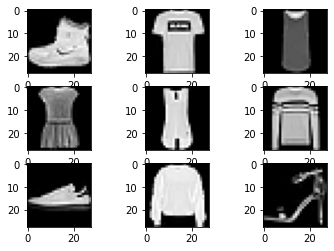



Dataset loaded
Shape of TrainX:  (60000, 28, 28, 1)
Shape of TrainY:  (60000, 10)
Shape of TestX:  (10000, 28, 28, 1)
Shape of TestY:  (10000, 10)
Maximum in trainX  255


Normalised in [0,1]
Maximum in training data  1.0


Summary of the prepared model:
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_68 (Dense)             (None, 100)               1254500   
_________________________________________________________________
dense_69 (Dense)             (None, 10)                1010 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


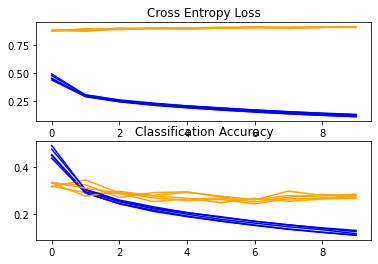

Mean of train accuracy: 91.33
 Std dev of train accuracy: 0.17


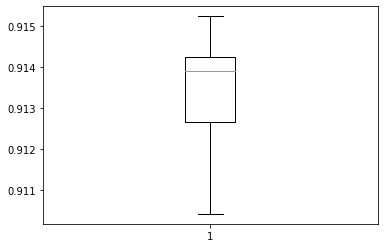

313/313 - 1s - loss: 0.3063 - accuracy: 0.9052
Test loss = 0.306
Test accuracy = 90.520


In [81]:
driver()

In [40]:
%%html
<h3><u> Reference</u></h3>
<a href = "https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/">
Jason Brownlee PhD, How to Develop a Deep CNN for Fashion-MNIST Clothing Classification
</a>

<h3> <u>Implemented for practice by </u> </h3>
<h4> Md. Al Siam </h4>
<p> Dept of CSE </p>
<a href = "https://www.ruet.ac.bd/">
RUET
</a>